In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
from functools import partial
import sys
sys.path.insert(0, '..')
import harmonic as hm
sys.path.append("../examples")
import utils

In [2]:
def ln_prior_uniform(x, xmin=-6.0, xmax=6.0, ymin=-6.0, ymax=6.0):
    if x[0] >= xmin and x[0] <= xmax and x[1] >= ymin and x[1] <= ymax:        
        return 1.0 / ( (xmax - xmin) * (ymax - ymin) )
    else:
        return 0.0

In [3]:
def ln_likelihood(x):
    f = (x[0]**2 + x[1] - 11.0)**2 + (x[0] + x[1]**2 - 7.0)**2
    return -f

In [4]:
def ln_posterior(x, ln_prior):
    ln_L = ln_likelihood(x)

    if not np.isfinite(ln_L):
        return -np.inf
    else:
        return ln_prior(x) + ln_L

In [5]:
# Define parameters for emcee sampling
ndim = 2                    # number of dimensions
nchains = 200               # total number of chains to compute
samples_per_chain = 5000    # number of samples per chain
nburn = 2000                # number of samples to discard as burn in

# Initialize random seed
np.random.seed(4)

# Define ln_prior function
xmin = -6.0
xmax = 6.0
ymin = -6.0
ymax = 6.0  
ln_prior = partial(ln_prior_uniform, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)  

In [111]:
# Set initial random position and state
pos = np.random.rand(ndim * nchains).reshape((nchains, ndim)) * 10 -5
rstate = np.random.get_state()

# Instantiate and execute sampler 
sampler = emcee.EnsembleSampler(nchains, ndim, ln_posterior, args=[ln_prior])
(pos, prob, state) = sampler.run_mcmc(pos, samples_per_chain, rstate0=rstate) 

# Collect samples into contiguous numpy arrays (discarding burn in)
samples = np.ascontiguousarray(sampler.chain[:,nburn:,:])
lnprob = np.ascontiguousarray(sampler.lnprobability[:,nburn:])

(-4.0, -3.0) nsample_means: 43 npos: 43
(-3.0, 3.0) nsample_means: 48 npos: 48
(4.0, -2.0) nsample_means: 57 npos: 47
(3.0, 2.0) nsample_means: 52 npos: 52


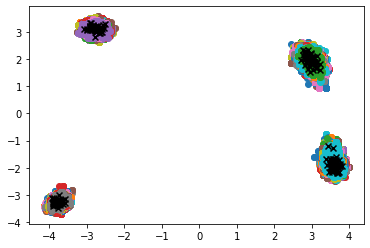

In [112]:
means=np.zeros([2,nchains])
for ichain in range(nchains):
    plt.scatter(samples[ichain,:,0],samples[ichain,:,1])
    (means[0,ichain],means[1,ichain])=(np.round(np.mean(samples[ichain,...],axis=0)))
plt.scatter(pos[:,0],pos[:,1],marker='x',color='k');

peaks=[(-4.,-3.), (-3.,3.), (4.,-2.), (3.,2.)]

for ipeak in range(len(peaks)):
    (i,j)=(0,0)
    for imean in range(nchains):
        if means[0,imean]==peaks[ipeak][0] and means[1,imean]==peaks[ipeak][1]:
            i=i+1
        if np.round(pos[imean,0])==peaks[ipeak][0] and np.round(pos[imean,1])==peaks[ipeak][1]:
            j=j+1
    print(peaks[ipeak], 'nsample_means:', i, 'npos:', j)

plt.show()